In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from callbacks import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score
import os
import tensorflow as tf
model_name = 'pokemon'

pd.set_option("display.max_columns", None)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data = train_data.rename(columns={"ID": "id"})

In [4]:
#dataframe map用
# pokemon_map = {27: 0, 72: 1, 79: 2, 81: 3, 100: 4, 102: 5}
bool_map = {True: 1, False: 0}

In [5]:
#把類別轉為one-hot之後，當成y label
# y = pd.get_dummies(train_data['class'].map(pokemon_map))
y = pd.get_dummies(train_data['class'])
train_data = train_data.drop('class', axis=1)

In [6]:
data = pd.concat([train_data, test_data], ignore_index=False)

In [7]:
#drop掉一些沒用的feature?
data = data.drop(['id', 'appearedMinute', 'gymIn100m', 'gymIn250m', 'gymIn500m', 
               'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m', 
               'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m'], axis=1)

In [8]:
data.head()

,appearedTimeOfDay,appearedHour,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,evening,19,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,True,True,True,False,0.523759,0.144120,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,night,5,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,False,False,False,True,0.565267,0.198728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,evening,19,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,False,False,False,True,0.195366,0.070373,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Fals

In [9]:
#drop掉cooc feature
cooc_feature = [col for col in data.columns if 'cooc' in col]
data = data.drop(cooc_feature, axis=1)

In [10]:
data.head()

,appearedTimeOfDay,appearedHour,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm
0,evening,19,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,True,True,True,False,0.523759,0.144120
1,night,5,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,False,False,False,True,0.565267,0.198728
2,evening,19,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,False,False,False,True,0.195366,0.070373
3,morning,11,0,True,Hobart,Australia,Clear,12.7,13.25,1014.19,clear-night,128.89505,False,False,False,True,0.190119,0.003920
4,evening,18,13,True,Los_Angeles,America,PartlyCloudy,19.1,5.78,1011.36,partly-cloudy-day,4188.39100,True,True,True,False,0.066120,0.071638


In [11]:
#把bool型態轉為1跟0
bool_features=data.select_dtypes(include=[np.bool]).columns
for col in bool_features:
    data[col] = data[col].astype(int)

In [12]:
data.head()

,appearedTimeOfDay,appearedHour,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm
0,evening,19,13,0,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,1,1,1,0,0.523759,0.144120
1,night,5,13,1,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,0,0,0,1,0.565267,0.198728
2,evening,19,0,1,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,0,0,0,1,0.195366,0.070373
3,morning,11,0,1,Hobart,Australia,Clear,12.7,13.25,1014.19,clear-night,128.89505,0,0,0,1,0.190119,0.003920
4,evening,18,13,1,Los_Angeles,America,PartlyCloudy,19.1,5.78,1011.36,partly-cloudy-day,4188.39100,1,1,1,0,0.066120,0.071638


In [13]:
#terrainType是類別型資料
data['terrainType'] = data['terrainType'].astype(str)

In [14]:
#類別型變數轉one-hot encode
data = pd.get_dummies(data)

In [15]:
#feature scale normalize
scaler = MinMaxScaler()
data['population_density'] = scaler.fit_transform(data['population_density'].values.reshape(-1, 1))
data['pressure'] = scaler.fit_transform(data['pressure'].values.reshape(-1, 1))

In [16]:
#距離太遠的直接給他一個定植
mask = data['gymDistanceKm'] > 10
data.loc[mask, 'gymDistanceKm'] = 10

mask = data['pokestopDistanceKm'] > 5
data.loc[mask, 'pokestopDistanceKm'] = 5

In [17]:
data.head()

,appearedHour,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm,appearedTimeOfDay_afternoon,appearedTimeOfDay_evening,appearedTimeOfDay_morning,appearedTimeOfDay_night,terrainType_0,terrainType_1,terrainType_10,terrainType_11,terrainType_12,terrainType_13,terrainType_14,terrainType_16,terrainType_2,terrainType_4,terrainType_5,terrainType_7,terrainType_8,terrainType_9,city_Adelaide,city_Amsterdam,city_Athens,city_Auckland,city_Bahia,city_Bangkok,city_Belem,city_Berlin,city_Boise,city_Brisbane,city_Brunei,city_Brussels,city_Bucharest,city_Buenos_Aires,city_Casablanca,city_Chicago,city_Copenhagen,city_Denver,city_Detroit,city_Dubai,city_Dublin,city_Edmonton,city_Guam,city_Halifax,city_Helsinki,city_Ho_Chi_Minh,city_Hobart,city_Hong_Kong,city_Honolulu,city_Indianapolis,city_Jakarta,city_Karachi,city_Kolkata,city_Kuala_Lumpur,city_Kuching,city_Lisbon,city_Ljubljana,city_London,city_Los_Angeles,city_Louisville,city_Luanda,city_Madrid,city_Manila,city_Melbourne,city_Mexico_City,city_Monterrey,city_Montreal,city_New_York,city_Nicosia,city_Noumea,city_Oslo,city_Paris,city_Perth,city_Phoenix,city_Prague,city_Puerto_Rico,city_Regina,city_Rome,city_Santiago,city_Sao_Paulo,city_Singapore,city_Stockholm,city_Sydney,city_Tahiti,city_Taipei,city_Tokyo,city_Toronto,city_Tripoli,city_Tunis,city_Vancouver,city_Vienna,city_Vilnius,city_Warsaw,city_Zagreb,city_Zurich,continent_Africa,continent_America,continent_America/Argentina,continent_America/Indiana,continent_America/Kentucky,continent_Asia,continent_Australia,continent_Europe,continent_Pacific,weather_Breezy,weather_BreezyandMostlyCloudy,weather_BreezyandOvercast,weather_BreezyandPartlyCloudy,weather_Clear,weather_DangerouslyWindy,weather_Drizzle,weather_DrizzleandBreezy,weather_Dry,weather_DryandPartlyCloudy,weather_Foggy,weather_HeavyRain,weather_Humid,weather_HumidandOvercast,weather_HumidandPartlyCloudy,weather_LightRain,weather_LightRainandBreezy,weather_MostlyCloudy,weather_Overcast,weather_PartlyCloudy,weather_Rain,weather_RainandWindy,weather_Windy,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
0,19,0,27.8,9.00,0.333774,0.601904,1,1,1,0,0.523759,0.144120,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,1,26.1,8.70,0.598044,0.000000,0,0,0,1,0.565267,0.198728,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,19,1,24.7,16.82,0.710624,0.000000,0,0,0,1,0.195366,0.070373,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,11,1,12.7,13.25,0.471987,0.012890,0,0,0,1,0.190119,0.003920,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,18,1,19.1,5.78,0.397199,0.418839,1,1,1,0,0.066120,0.071638,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
X = data[:len(y)]

In [19]:
#train validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

In [20]:
#callback parameters setting
model_dict = {
    'model_name' : model_name,
    'reduce_lr' : ReduceLROnPlateau(lr=0.001, factor=0.7, patience=5),
    'earlystop' : EarlyStopping(min_delta = 1e-4, patience= 10),
    'checkpoint' : Model_checkpoint(os.path.join('model', model_name)),
    'train_batch_log' : History(['loss']),
    'val_batch_log' : History(['loss']),
    'history' : {
        'train_loss':[],
        'val_loss':[]
    },
    'testing' : {
        'y_true' : [],
        'y_pred' : [],
        'files'   : []
    }
}

callback_dict = {
    'on_session_begin':[], # start of a session
    'on_batch_begin':[], # start of a training batch
    'on_batch_end':[], # end of a training batch
    'on_epoch_begin':[], # start of a epoch
    'on_epoch_end':[
        model_dict['reduce_lr'],
        model_dict['earlystop'],
        model_dict['checkpoint']
    ], # end of a epoch
    'on_session_end':[] # end of a session
}
callback_manager = Run_collected_functions(callback_dict)

# Graph

In [21]:
tf.reset_default_graph() ## 將graph reset,重新 build graph 需要跑這行

In [22]:
#### define placeholder ####
input_data = tf.placeholder(dtype=tf.float32, 
                           shape=[None, X_train.shape[1]],
                           name='input_data') #用來接 feature 資料進入 tensorflow 

y_true = tf.placeholder(dtype=tf.float32, 
                        shape=[None, y_train.shape[1]],
                        name='y_true') #用來接 label 資料進入 tensorflow 

lr = tf.placeholder(tf.float32, shape=[],name='learning_rate')  
drp_rate = tf.placeholder(dtype=tf.float32, name = 'dropout')
is_train = tf.placeholder(dtype=tf.bool)

In [23]:
#### define variables(weight/bias) ####
x1 = tf.layers.dense(input_data, 64, activation=tf.nn.relu, name='hidden1') #第一層hidden layer
x1 = tf.layers.dropout(x1, rate=drp_rate, training=is_train)
x2 = tf.layers.dense(x1, 32, activation=tf.nn.relu, name='hidden2') #第二層hidden layer
x2 = tf.layers.dropout(x2, rate=drp_rate, training=is_train)
logits = tf.layers.dense(x2, y_train.shape[1], name='logits')# output layer
out = tf.nn.softmax(logits)

In [24]:
#### calculate loss ####
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=logits))

In [25]:
# Evaluate
correct_pred = tf.equal(tf.argmax(out, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [26]:
#### optimize variables ####
opt = tf.train.AdamOptimizer(learning_rate=lr)

update = opt.minimize(loss)

In [27]:
#### init ####
init = tf.global_variables_initializer()
#saver
saver = tf.train.Saver() # 處理模型儲存、載入

In [28]:
# #for tensorboard
# logs_path = 'tensorboard'
# writer = tf.summary.FileWriter(logs_path,graph=tf.get_default_graph())

# Session

In [29]:
sess = tf.Session()
sess.run(init)

In [30]:
epochs = 1000 #要跑多少epoch
bs = 32 #設定看過幾筆資料走一次更新(batch size)
update_per_epoch = len(X_train)//bs #一個epoch要跑幾個batch

epoch: 0     val_acc: 0.25512105226516724    validation loss: 1.7233480215072632
epoch: 1     val_acc: 0.29888269305229187    validation loss: 1.6296178102493286
epoch: 2     val_acc: 0.3854748606681824    validation loss: 1.5349477529525757
epoch: 3     val_acc: 0.42830538749694824    validation loss: 1.438763976097107
epoch: 4     val_acc: 0.43389198184013367    validation loss: 1.3908166885375977
epoch: 5     val_acc: 0.4711359441280365    validation loss: 1.3626699447631836
epoch: 6     val_acc: 0.4711359441280365    validation loss: 1.3530540466308594
epoch: 7     val_acc: 0.4813780188560486    validation loss: 1.3261888027191162
epoch: 8     val_acc: 0.49534451961517334    validation loss: 1.3151652812957764
epoch: 9     val_acc: 0.48230913281440735    validation loss: 1.3141016960144043
epoch: 10     val_acc: 0.4934823215007782    validation loss: 1.2965167760849
epoch: 11     val_acc: 0.49534451961517334    validation loss: 1.2861374616622925
epoch: 12     val_acc: 0.5018621683

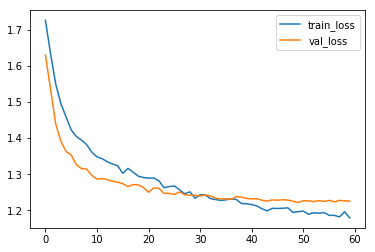

min val loss: 1.2216178178787231



In [31]:
for i in range(epochs):
    X_train, y_train = shuffle(X_train, y_train)
    batch_index = 0
    for j in range(update_per_epoch):
        x_batch = X_train[batch_index:batch_index+bs]
        y_batch = y_train[batch_index:batch_index+bs]
        batch_index += bs
        tr_pred, training_loss_batch, _ = sess.run([out, loss, update], feed_dict={
            input_data:x_batch,
            y_true:y_batch,
            lr:model_dict['reduce_lr'].lr,
            drp_rate:0.3,
            is_train:True
        })      
        model_dict['train_batch_log'].push({'loss':training_loss_batch})


        
    model_dict['history']['train_loss'].append(model_dict['train_batch_log'].avg_value('loss'))
    model_dict['train_batch_log'].reset()
    
    val_pred, val_loss, val_acc = sess.run([out, loss, accuracy], feed_dict={
        input_data:X_val,
        y_true:y_val,
        drp_rate: 0.0,
        is_train: False        
    })    
    model_dict['val_batch_log'].push({'loss':val_loss}, len(X_val))   
    model_dict['history']['val_loss'].append(model_dict['val_batch_log'].avg_value('loss'))
    model_dict['val_batch_log'].reset()


    print('epoch: {}     val_acc: {}    '.format(i, val_acc), end='')
    print('validation loss: {}'.format(model_dict['history']['val_loss'][-1]))
    callback_manager.run_on_epoch_end(val_loss = model_dict['history']['val_loss'][-1],
                                      sess = sess,
                                      saver = saver,
                                      nth_epoch = epochs)
    
    if model_dict['earlystop'].stop:
        ### draw loss curve ###
        plt.plot(model_dict['history']['train_loss'][1:], label='train_loss')
        plt.plot(model_dict['history']['val_loss'][1:], label='val_loss')
        plt.legend()
        plt.show()
        print('min val loss: {}'.format(model_dict['checkpoint'].min_loss))
        print()
        break      

In [32]:
#在training set有好的結果之後，可以開始對testing預測了

In [33]:
''' load model '''
saver.restore(sess, os.path.join('model', model_name) + '.ckpt')

INFO:tensorflow:Restoring parameters from model/pokemon.ckpt


In [34]:
testing_data = data[len(y):]

In [35]:
test_pred = sess.run(out, feed_dict={input_data:testing_data, 
                                     drp_rate: 0.0,
                                     is_train: False})  

In [36]:
result = np.argmax(test_pred, axis=1)

In [37]:
#Outputfile
output_id = test_data['id']

output = list(zip(output_id,result))
df = pd.DataFrame(data=output, columns=['ID', 'class'])
df.to_csv('out.csv', index = False, header = True)